In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

from local_python.plot_utils import plot_distribution_barh, plot_example_images

In [7]:
data_split_dir = "../data_splits/"
config_path = "../datasets/plot_images_samples.csv"
dataset_name = "PlantVillage"
dataset_name = "Cassava"
dataset_name = "PlantDataset"
dataset_name = "PlantDoc"
dataset_name = "PDDD"
dataset_name = "DARMA"
dataset_name = "Fitzpatrick17k"
dataset_name = "HAM10000"
dataset_name = "DDI"
dataset_name = "PAD-UFES-20"
title = dataset_name

In [8]:
dataset_path = None
for filename in os.listdir(data_split_dir):
    if dataset_name.lower() in filename.lower():
        dataset_path = os.path.join(data_split_dir, filename)
        break

df_full = None
if not dataset_path is None:
    df_full = pd.read_csv(dataset_path, index_col=0)
    print(f"Available columns: {df_full.columns.values}")

custom_label_map = {}
if dataset_name == "Cassava":
    custom_label_map = {
        "0": "Bacterial Blight (CBB)",
        "1": "Brown Streak Disease (CBSD)",
        "2": "Green Mottle (CGM)",
        "3": "Mosaic Disease (CMD)",
        "4": "Healthy",
    }
elif dataset_name == "HAM10000":
    custom_label_map = {
        "mel": "Melanoma",
        "nv": "Nevi",
        "bcc": "Basal cell carcinoma",
        "akiec": "Actinic keratosis",
        "bkl": "Benign keratosis",
        "df": "Dermatofibroma",
        "vasc": "Vascular",
    }
    # Melanoma (MEL), Nevi (NV), Basal cell carcinoma (BCC), Actinic keratosis / Bowens disease (intraepithelial carcinoma) (AKIEC), Benign keratosis (BKL), Dermatofibroma (DF) and Vascular (VASC).
elif dataset_name == "DDI":
    custom_label_map = {"True": "Malignant", "False": "Non-malignant"}
elif dataset_name == "PAD-UFES-20":
    custom_label_map = {
        "BCC": "Basal Cell Carcinoma",
        "SCC": "Squamous Cell Carcinoma",
        "ACK": "Actinic Keratosis",
        "SEK": "Seborrheic Keratosis",
        "BOD": "Bowens disease",
        "MEL": "Melanoma",
        "NEV": "Nevus",
    }
    #  (1) Basal Cell Carcinoma (BCC), (2) Squamous Cell Carcinoma (SCC), (3) Actinic Keratosis (ACK), (4) Seborrheic Keratosis (SEK), (5) Bowens disease (BOD), (6) Melanoma (MEL), and (7 Nevus (NEV)


def custom_label(idx):
    idx = str(idx)
    if idx in custom_label_map:
        return custom_label_map[idx]
    else:
        return idx


def beautify_names(name):
    return re.sub(r"_+", " ", re.sub(r"\(.*\)", "", str(name))).strip()

Available columns: ['target_code' 'filepath' 'set']


6 classes with distribution: {'Nevus': 0, 'Basal Cell Carcinoma': 1, 'Actinic Keratosis': 2, 'Seborrheic Keratosis': 3, 'Squamous Cell Carcinoma': 4, 'Melanoma': 5}


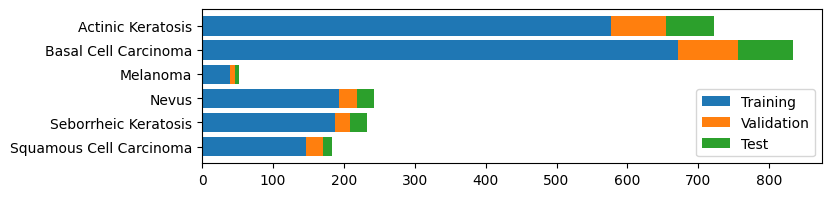

In [9]:
df_plot = df_full.copy()
df_plot["target_code"] = (
    df_plot["target_code"].apply(custom_label).apply(beautify_names)
)
df_plot["set"] = df_plot["set"].replace(
    to_replace=["train", "valid", "test"], value=["Training", "Validation", "Test"]
)

label_map = {
    label: idx for idx, label in enumerate(df_plot["target_code"].unique())
}  # NOTE: Keep original order
num_classes = len(label_map)
print(f"{num_classes} classes with distribution: {label_map}")

plt.figure(figsize=(8, 2))
title = f"Class distribution of {dataset_name}"
plot_distribution_barh(df_plot)  # , title=title
filename = title.lower().replace(" ", "_") + ".png"
# plt.savefig(os.path.join(f"../images/", filename), bbox_inches="tight")

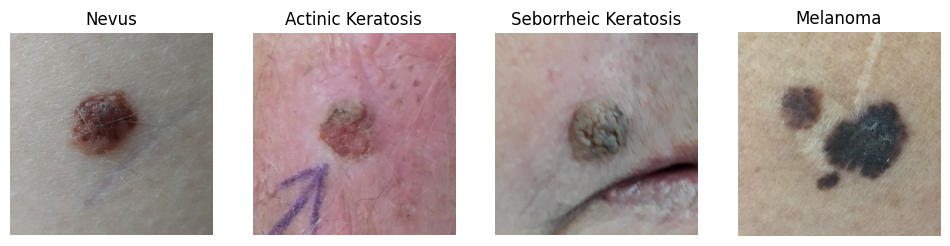

In [10]:
df_config = pd.read_csv(config_path)
df_config = df_config[df_config["dataset"] == dataset_name]

df_plot = df_config.copy()
df_plot["target_code"] = (
    df_plot["target_code"].apply(custom_label).apply(beautify_names)
)

plt.figure(figsize=(12, 7))
title = f"Example images of {dataset_name}"
plot_example_images(df_plot[["filepath", "target_code"]].values)
filename = title.lower().replace(" ", "_") + ".png"
plt.savefig(os.path.join(f"../images/", filename), bbox_inches="tight")